In [ ]:
#ライブラリのインポート
#グラフ描画用
import matplotlib.pyplot as plt
#行列ベクトル配列計算
import numpy as np
#データ読み込み配列操作グラフ化
import pandas as pd

In [ ]:
class ADALINE(object):
    #クラスをインスタンス化する時の初期化関数
    #コンストラクタ
    def __init__(self,eta=0.01,n_iter=50):
        self.eta=eta
        self.n_iter=n_iter
    #トレーニングする関数
    def fit(self,X,y):
        #重みを乱数（正規分布）から生成する
        self.w_=np.zeros(1+X.shape[1])
        self.cost_=[]
        #トレーニング回数分トレーニングデータを反復
        for i in range(self.n_iter):
            #活性化関数の出力の計算
            output=self.net_input(X)
            #誤差計算
            errors=(y-output)
            #w1以降の更新
            self.w_[1:]+=self.eta*X.T.dot(errors)
            #w0更新
            self.w_[0]+=self.eta*errors.sum()
            #コスト関数計算(勾配降下法)
            cost=(errors**2).sum()/2.0
            #コスト格納
            self.cost_.append(cost)
        return self
    #挿入力の計算
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    #活性化関数の出力を計算
    def activation(self,X):
        return self.net_input(X)
    #1ステップ後のクラスラベルを返す
    def predict(self,X):
        return np.where(self.activation(X)>=0.0,1,-1)

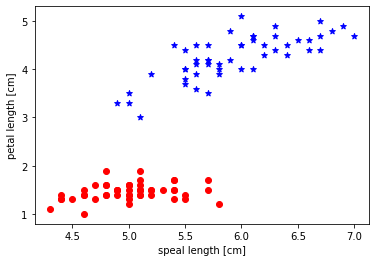

In [22]:
#Irisデータセットの入手
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
#1〜100まで目的変数抽出
y=df.iloc[0:100,4].values
#Iris-setosa:-1　iris-versicolor:1
y=np.where(y=="Iris-setosa",-1,1)
#1-100行目の1,3列めの抽出
X=df.iloc[0:100,[0,2]].values
#グラフのプロット
plt.scatter(X[:50,0],X[:50,1],color="red",marker="o",label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="blue",marker="*",label="versicolor")
#軸ラベルの設定
plt.xlabel("speal length [cm]")
plt.ylabel("petal length [cm]")
plt.show()

In [ ]:
#データのコピー
X_std=np.copy(X)
#各列の標準化
X_std[:,0]=(X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean())/X[:,1].std()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    #マーカーとカラーマップの用意
    markers=("s","x","o","^","v")
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #決定領域のプロット
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    #グリッドポイントの作成
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #特徴量を一次元配列に変換して予測を実行する
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果をグリッドポイントのデータサイズに変換
    Z=Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #クラスごとにサンプルをプロット
    #matplotlibが1.5.0以下ならc=cmapをc=colors[idx]に変更
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


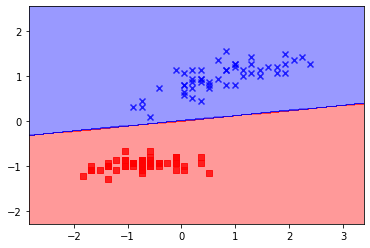

In [25]:
#勾配降下法によるADALINEの学習(標準化後)
ada=ADALINE(n_iter=15,eta=0.01)
#モデルの適合
ada.fit(X_std,y)
#境界領域のプロット
plot_decision_regions(X_std,y,classifier=ada)
#プロット
plt.show()